In [5]:
from tensorflow import keras
from tensorflow.keras import layers

# network with one linear unit
model = keras.Sequential([layers.Dense(units=1, input_shape=[3])]) # unit means how many outputs we want, input_shape the dimension of input

# network with 2 layers
model0 = keras.Sequential([layers.Dense(units=4, activation= 'relu', input_shape=[2]), layers.Dense(units=3, activation='relu'), layers.Dense(units=1)])

/home/necati/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model0.compile(optimizer="adam", loss="mae")

In [7]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/home/necati/machine_learning/data_sets/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [8]:
model1 = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)])


/home/necati/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model1.compile(
    optimizer = 'adam',
    loss = 'mae'
)

In [10]:
history = model1.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=256, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.3510 - val_loss: 0.1319
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1461 - val_loss: 0.1251
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1306 - val_loss: 0.1184
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1240 - val_loss: 0.1107
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1152 - val_loss: 0.1091
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1106 - val_loss: 0.1045
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1033 - val_loss: 0.1060
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1025 - val_loss: 0.1006
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0999 - val_loss: 0.1019
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0988 - val_loss: 0.1041


<AxesSubplot:>

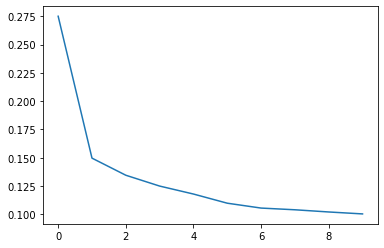

In [12]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df['loss'].plot()